## Question 1 

To verify if the formulations are significantly different statistically.

#### a. A descriptive analysis of the additives (columns named as “a” to “i”), which must include summaries of findings (parametric/non-parametric). Correlation and ANOVA, if applicable, is a must.

#### b. A graphical analysis of the additives, including a distribution study.

#### c. A clustering test of your choice (unsupervised learning), to determine the distinctive number of formulations present in the dataset.

---------------------------------------------------------------------------------

First of all we need to import necessary libraries to investigate the data and present solutions

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings("ignore")

Importting the dataset from folder Data/ingredient.csv - 
Since it is a .csv file we can use read_csv method to get pandas DataFrame

In [3]:
ingredient = pd.read_csv('Data/ingredient.csv')
ingredient.head()

,a,b,c,d,e,f,g,h,i
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00


## Exploratory Data Analysis
This part is a key to explore the data

In [4]:
# Finding out datatypes and if any of the columns iclude null values
ingredient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   a       214 non-null    float64
 1   b       214 non-null    float64
 2   c       214 non-null    float64
 3   d       214 non-null    float64
 4   e       214 non-null    float64
 5   f       214 non-null    float64
 6   g       214 non-null    float64
 7   h       214 non-null    float64
 8   i       214 non-null    float64
dtypes: float64(9)
memory usage: 15.2 KB


In [5]:
# Finding the total number of null values:
ingredient.isnull().sum()

a    0
b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
dtype: int64

All of the rows include a non-null value thus there is no need for Data cleaning approaches (interpolations or dropping null rows)

In [6]:
# Now we finding statistical features of each variable (Additives)
ingredient.describe() # method to find statistical features

,a,b,c,d,e,f,g,h,i
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


Based on the mean of the additives component "e" is the most used ingredient. In contrast, component "i" has the least usage in the creation of different petrols. The rest of the statistical features are going to be used for further analysis.

In [7]:
# Finding the correlation of the components
ingredient.corr()

,a,b,c,d,e,f,g,h,i
a,1.000000,-0.191885,-0.122274,-0.407326,-0.542052,-0.289833,0.810403,-0.000386,0.143010
b,-0.191885,1.000000,-0.273732,0.156794,-0.069809,-0.266087,-0.275442,0.326603,-0.241346
c,-0.122274,-0.273732,1.000000,-0.481799,-0.165927,0.005396,-0.443750,-0.492262,0.083060
d,-0.407326,0.156794,-0.481799,1.000000,-0.005524,0.325958,-0.259592,0.479404,-0.074402
e,-0.542052,-0.069809,-0.165927,-0.005524,1.000000,-0.193331,-0.208732,-0.102151,-0.094201
f,-0.289833,-0.266087,0.005396,0.325958,-0.193331,1.000000,-0.317836,-0.042618,-0.007719
g,0.810403,-0.275442,-0.443750,-0.259592,-0.208732,-0.317836,1.000000,-0.112841,0.124968
h,-0.000386,0.326603,-0.492262,0.479404,-0.102151,-0.042618,-0.112841,1.000000,-0.058692
i,0.143010,-0.241346,0.083060,-0.074402,-0.094201,-0.007719,0.124968,-0.058692,1.000000


### In order to visualize the correlation we can use Heatmap which is a feature in Seaborn library

Text(123.0, 0.5, 'Additives')

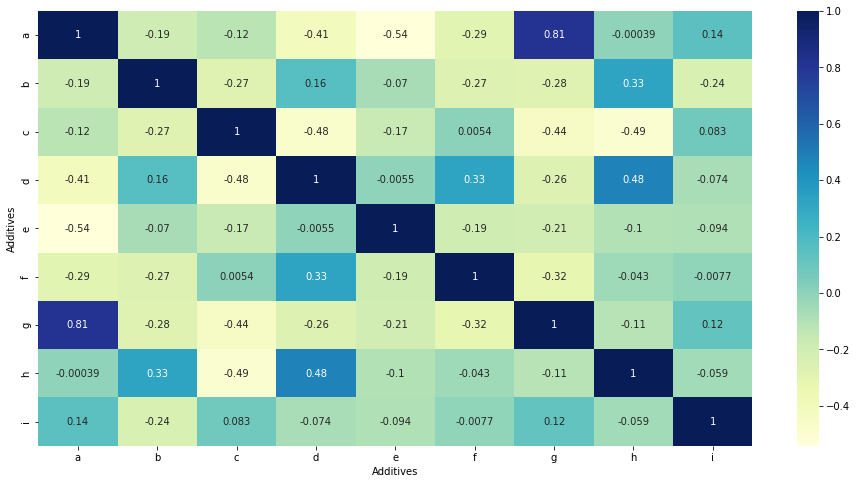

In [8]:
plt.figure(figsize=(16,8))
sns.heatmap(ingredient.corr(),annot=True, cmap="YlGnBu")
plt.xlabel('Additives')
plt.ylabel('Additives')

Since heatmap visualized the correlation of ingredients now we can better understand the impact each additives have to each other: High positice (if one increase the other will probably increase two) -  High negative (if one increase the other additives will probably decrease)

For example:

Additive a: High positive correlation with g , High negative correlation e and d (if a increase these two additives will probably decrease)

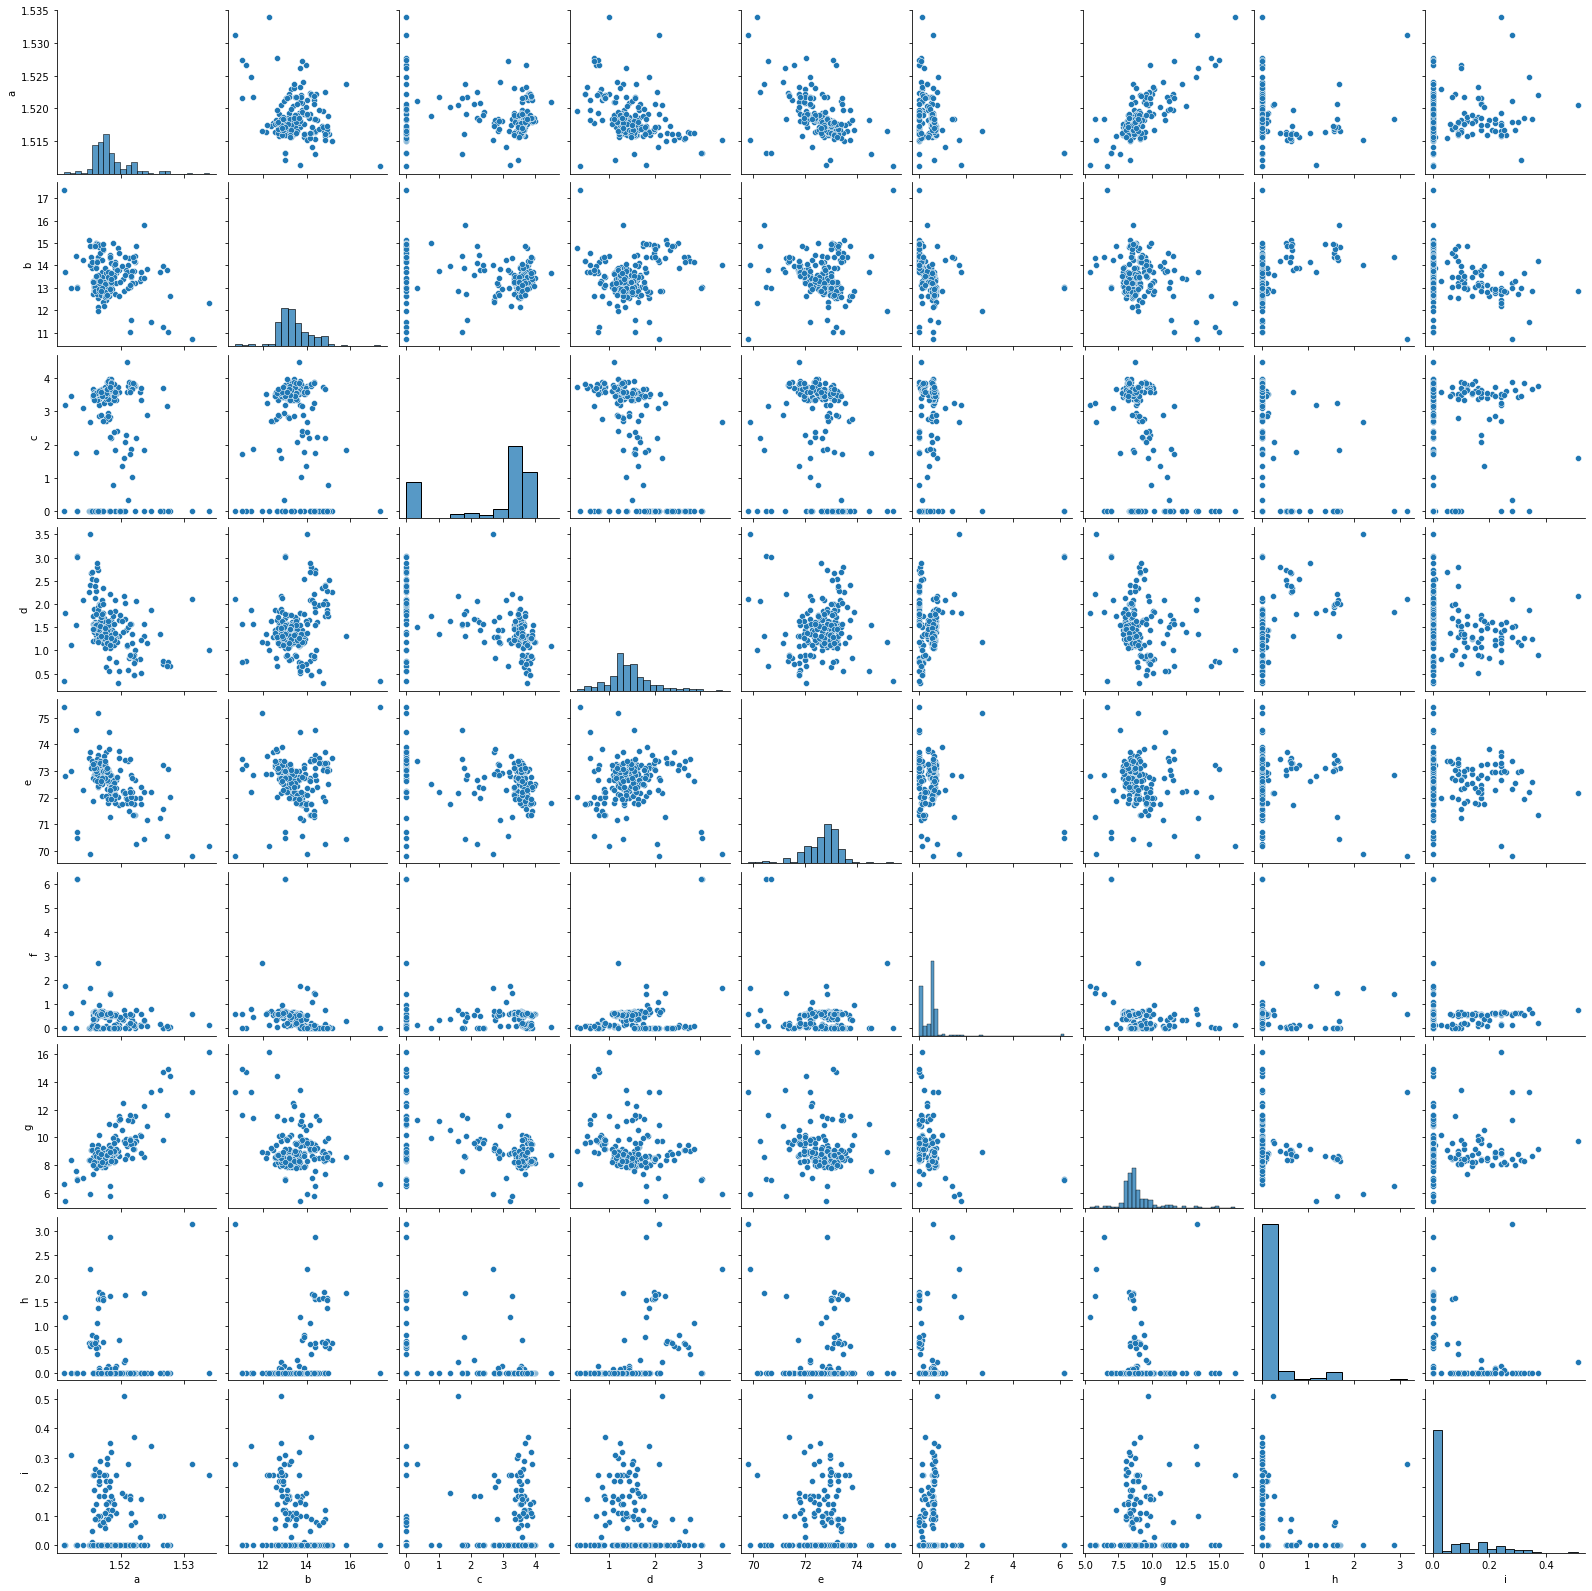

In [74]:
sns.pairplot(ingredient)

The pairplot above proves the correlation of the additives collected from heatmap is accurate. for instance the correlation between between pairs a-g (high positive), a-d and a-e (high negative)

## Investigation of outliers

In order to investigate the outliers in different additives, boxplots come in handy. It is clear that each additive consists of different ranges of values thus a simple boxplot will not demonstrate the outliers effectively.

However, from this simple boxplot we can notice difference between the means of additives.

In order to test this assumption ANOVA method is used to check if the additives means are significantly different from each other. (Here since there are more than two groups of components T-test is not suggested but it could be used to differentiate two groups of components)

<AxesSubplot:>

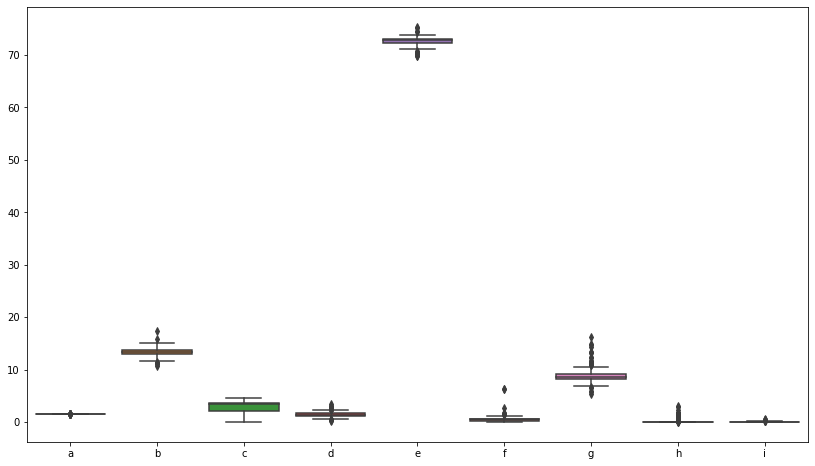

In [9]:
# Simple boxplot using seaborn
plt.figure(figsize=(14,8))
sns.boxplot(data = ingredient)

Additives "e", "g" and "b" ranges are significantly different than other additives making investing outliers troublesome.

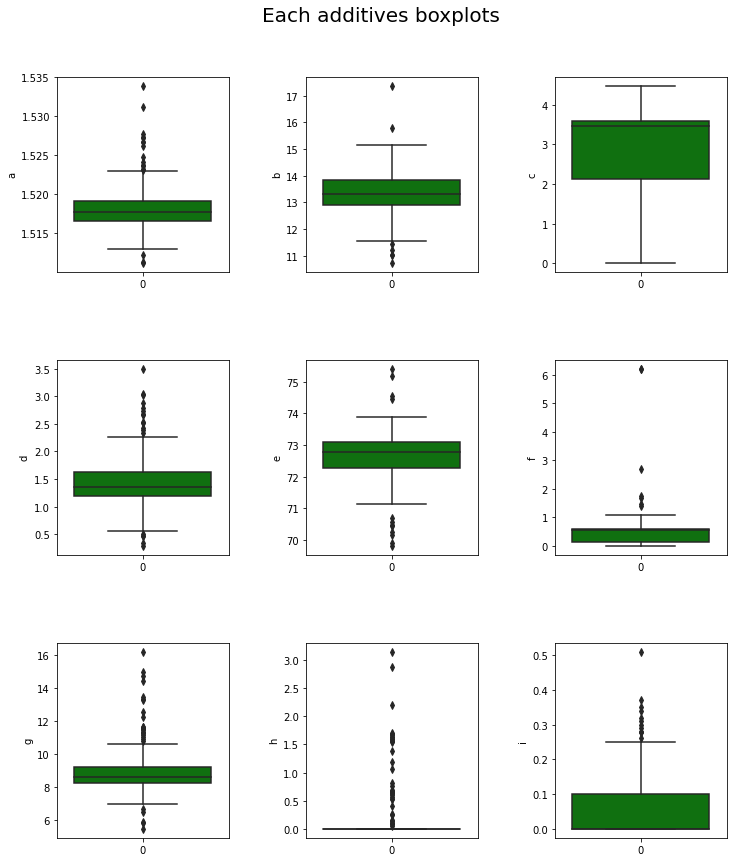

In [44]:
# Showing each components in a separate boxplot for better understanding:
plt.figure(figsize=(12,14))
plt.subplots_adjust(hspace=0.45, wspace = 0.45)
plt.suptitle("Each additives boxplots", fontsize=20, y = 0.95)
for i in range(len(ingredient.columns)):
    ax = plt.subplot(3,3,i+1)
    sns.boxplot(data = ingredient[str(ingredient.columns[i])], color = "g")
    #sns.swarmplot(data = ingredient[str(ingredient.columns[i])], color = "r")
    plt.ylabel(str(ingredient.columns[i]))

Now that each additives are shown in separate boxplot we can see that there are outliers for almost every components. These outliers could be eliminated using methods asuch as Z-score. However, due to the fact that the dataset is small the outliers will be kept.

## ANOVA
#### Hypotheses:
1. Null hypothesis: Groups means are equal (no variation in means of groups)
H0: μ1=μ2=…=μp
2. Alternative hypothesis: At least, one group mean is different from other groups
H1: All μ are not equal

In [41]:
# In order to use ANOVA (ANalysis Of Variance) some preprocessings are needed
# Firstly: Reshaping the data
igForANOVA = pd.melt(ingredient,value_vars=ingredient.columns,var_name='Additive')
igForANOVA.head()

,Additive,value
0,a,1.51735
1,a,1.53125
2,a,1.52300
3,a,1.51768
4,a,1.51813


In [42]:
# Checking to see if all of the additives have the same number of rows
igForANOVA['Additive'].value_counts().sort_index()

a    214
b    214
c    214
d    214
e    214
f    214
g    214
h    214
i    214
Name: Additive, dtype: int64

In [46]:
# Here we need statsmodel library to do ANOVA testing (Getting 
# ANOVA table like R output)
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [50]:
# Using ordinary least square model
model = ols('value~Additive',data = igForANOVA).fit()
AnovaTable = sm.stats.anova_lm(model, type=2)
AnovaTable # output (ANOVA F and p value)

,df,sum_sq,mean_sq,F,PR(>F)
Additive,8.0,943261.084445,117907.635556,168331.968858,0.0
Residual,1917.0,1342.757047,0.700447,NaN,NaN


#### Interpretation of the table:
The p value obtained from ANOVA analysis is significant (p < 0.05), and therefore, we conclude that there are significant differences among treatments.

From ANOVA analysis, we know that Additives differences are statistically significant, but ANOVA does not tell which Additives are significantly different from each other. To know the pairs of significant different Additives, it is common to perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

In [58]:
# Using the statsmodels library and using Tukey HSD test to pairwise difference 
from scikit_posthocs import posthoc_tukey_hsd

In [70]:
tukey = posthoc_tukey_hsd(x = igForANOVA['value'],g = igForANOVA['Additive'], alpha = 0.05)
tukey = tukey.to_numpy() # DataFrame with 0, 1, and -1 values, where 0 is False (not significant), 1 is True (significant), and -1 is for diagonal elements.
np.fill_diagonal(tukey, -1) # Fixing the bug in the library (-1 is shown as 1)
tukey = pd.DataFrame(tukey, columns = ingredient.columns, index = ingredient.columns)
tukey

,a,b,c,d,e,f,g,h,i
a,-1,1,1,0,1,1,1,1,1
b,1,-1,1,1,1,1,1,1,1
c,1,1,-1,1,1,1,1,1,1
d,0,1,1,-1,1,1,1,1,1
e,1,1,1,1,-1,1,1,1,1
f,1,1,1,1,1,-1,1,1,1
g,1,1,1,1,1,1,-1,1,1
h,1,1,1,1,1,1,1,-1,0
i,1,1,1,1,1,1,1,0,-1


#### Interpretation of the table:
Using the library from scikit_posthoc it can be confirmed that except: 
1. a and d
2. h and i

The rest of the additives have significantly different from each other

In [72]:
# Checking the TukeyHSD more thorougly
from pingouin import pairwise_tukey
ptuckey = pairwise_tukey(data = igForANOVA, dv='value', between='Additive')
ptuckey

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,a,b,1.518365,13.407850,-11.889485,0.080909,-146.949215,0.000000,-14.181091
1,a,c,1.518365,2.684533,-1.166167,0.080909,-14.413355,0.000000,-1.390937
2,a,d,1.518365,1.444907,0.073459,0.080909,0.907922,0.992576,0.087618
3,a,e,1.518365,72.650935,-71.132569,0.080909,-879.169716,0.000000,-84.842822
4,a,f,1.518365,0.497056,1.021309,0.080909,12.622969,0.000000,1.218159
5,a,g,1.518365,8.956963,-7.438597,0.080909,-91.938046,0.000000,-8.872329
6,a,h,1.518365,0.175047,1.343319,0.080909,16.602874,0.000000,1.602233
7,a,i,1.518365,0.057009,1.461356,0.080909,18.061769,0.000000,1.743021
8,b,c,13.407850,2.684533,10.723318,0.080909,132.535860,0.000000,12.790154
9,b,d,13.407850,1.444907,11.962944,0.080909,147.857137,0.000000,14.268709


We can see the proof of the assumption from previous method here as discussed only a-d and h-i are not significantly different and the rest of the pairwise relationships are significantly different.

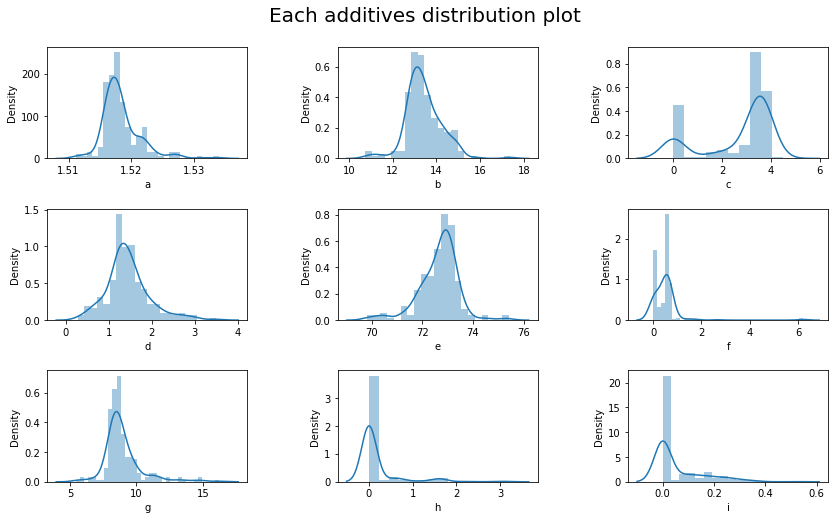

In [81]:
plt.figure(figsize=(14,8))
plt.subplots_adjust(hspace=0.45, wspace = 0.45)
plt.suptitle("Each additives distribution plot", fontsize=20, y = 0.95)
for i in range(len(ingredient.columns)):
    ax = plt.subplot(3,3,i+1)
    sns.distplot(ingredient[str(ingredient.columns[i])])
    #sns.swarmplot(data = ingredient[str(ingredient.columns[i])], color = "r")
    plt.xlabel(str(ingredient.columns[i]))

It is possible to sum up a few conclusions from the above distributions:
1. Components i, h and f were consumed fewer than the rest of the components which have normal distrubutions
2. Components c has two local maximums meaning there are formulas that uses c a lot or there are many formulas that don't require high amount of component c

In [82]:
# For clustering we need to normalize our data, the common approach to 
# use min max scaler

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(ingredient)
norm_ingredient = scaler.transform(ingredient)

## Clustering methods
Perhaps one of the widely used methods for clustering in K means clustering which is going to be used as on of the clustering methods here:

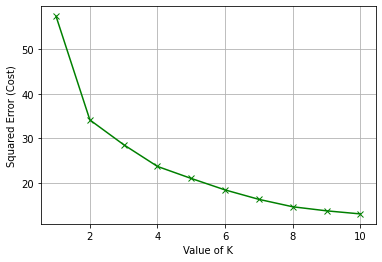

In [90]:
from sklearn.cluster import KMeans
# Using the elbow method to find the optimal K
cost =[]
for i in range(1, 11):
    KM = KMeans(n_clusters = i, max_iter = 500)
    KM.fit(norm_ingredient)
     
    # calculates squared error
    # for the clustered points
    cost.append(KM.inertia_)    
 
# plot the cost against K values
plt.plot(range(1, 11), cost, 'gx-')
plt.grid()
plt.xlabel("Value of K")
plt.ylabel("Squared Error (Cost)")
plt.show() # clear the plot

From the above graph it is clearly seen that the elbow is formed at K = 3

## Plotting the clusters using KMean method

In [98]:
kmeans = KMeans(n_clusters=3) # declaration of the model with the number of clusters
label = kmeans.fit_predict(norm_ingredient) # Predicting and fitting the values and extracting the label

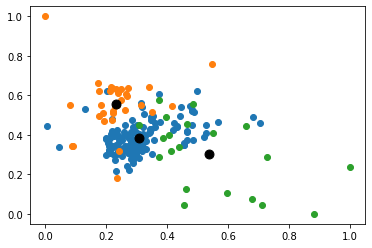

In [102]:
u_labels = np.unique(label)
centroids = kmeans.cluster_centers_
for i in u_labels:
    plt.scatter(norm_ingredient[label == i , 0] , norm_ingredient[label == i , 1] , label = i) # Plotting each labels
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k') # Plotting the centroids

There is a catch to the data above:
Since it is plotted in 2-D there are many data on top of each other in the same point. Furthermore, the data is multi-dimentional thus one approach would be to plot a 3-D KMeans cluster.

In [103]:
ingredients_3D = ingredient.copy()

In [107]:
ingredients_3D['cluster'] = label
ingredients_3D

,a,b,c,d,e,f,g,h,i,cluster
0,1.51735,13.02,3.54,1.69,72.73,0.54,8.44,0.00,0.07,0
1,1.53125,10.73,0.00,2.10,69.81,0.58,13.30,3.15,0.28,2
2,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,0
3,1.51768,12.56,3.52,1.43,73.15,0.57,8.54,0.00,0.00,0
4,1.51813,13.43,3.98,1.18,72.49,0.58,8.15,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
209,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,0
210,1.51848,13.64,3.87,1.27,71.96,0.54,8.32,0.00,0.32,0
211,1.51784,12.68,3.67,1.16,73.11,0.61,8.70,0.00,0.00,0
212,1.51841,12.93,3.74,1.11,72.28,0.64,8.96,0.00,0.22,0


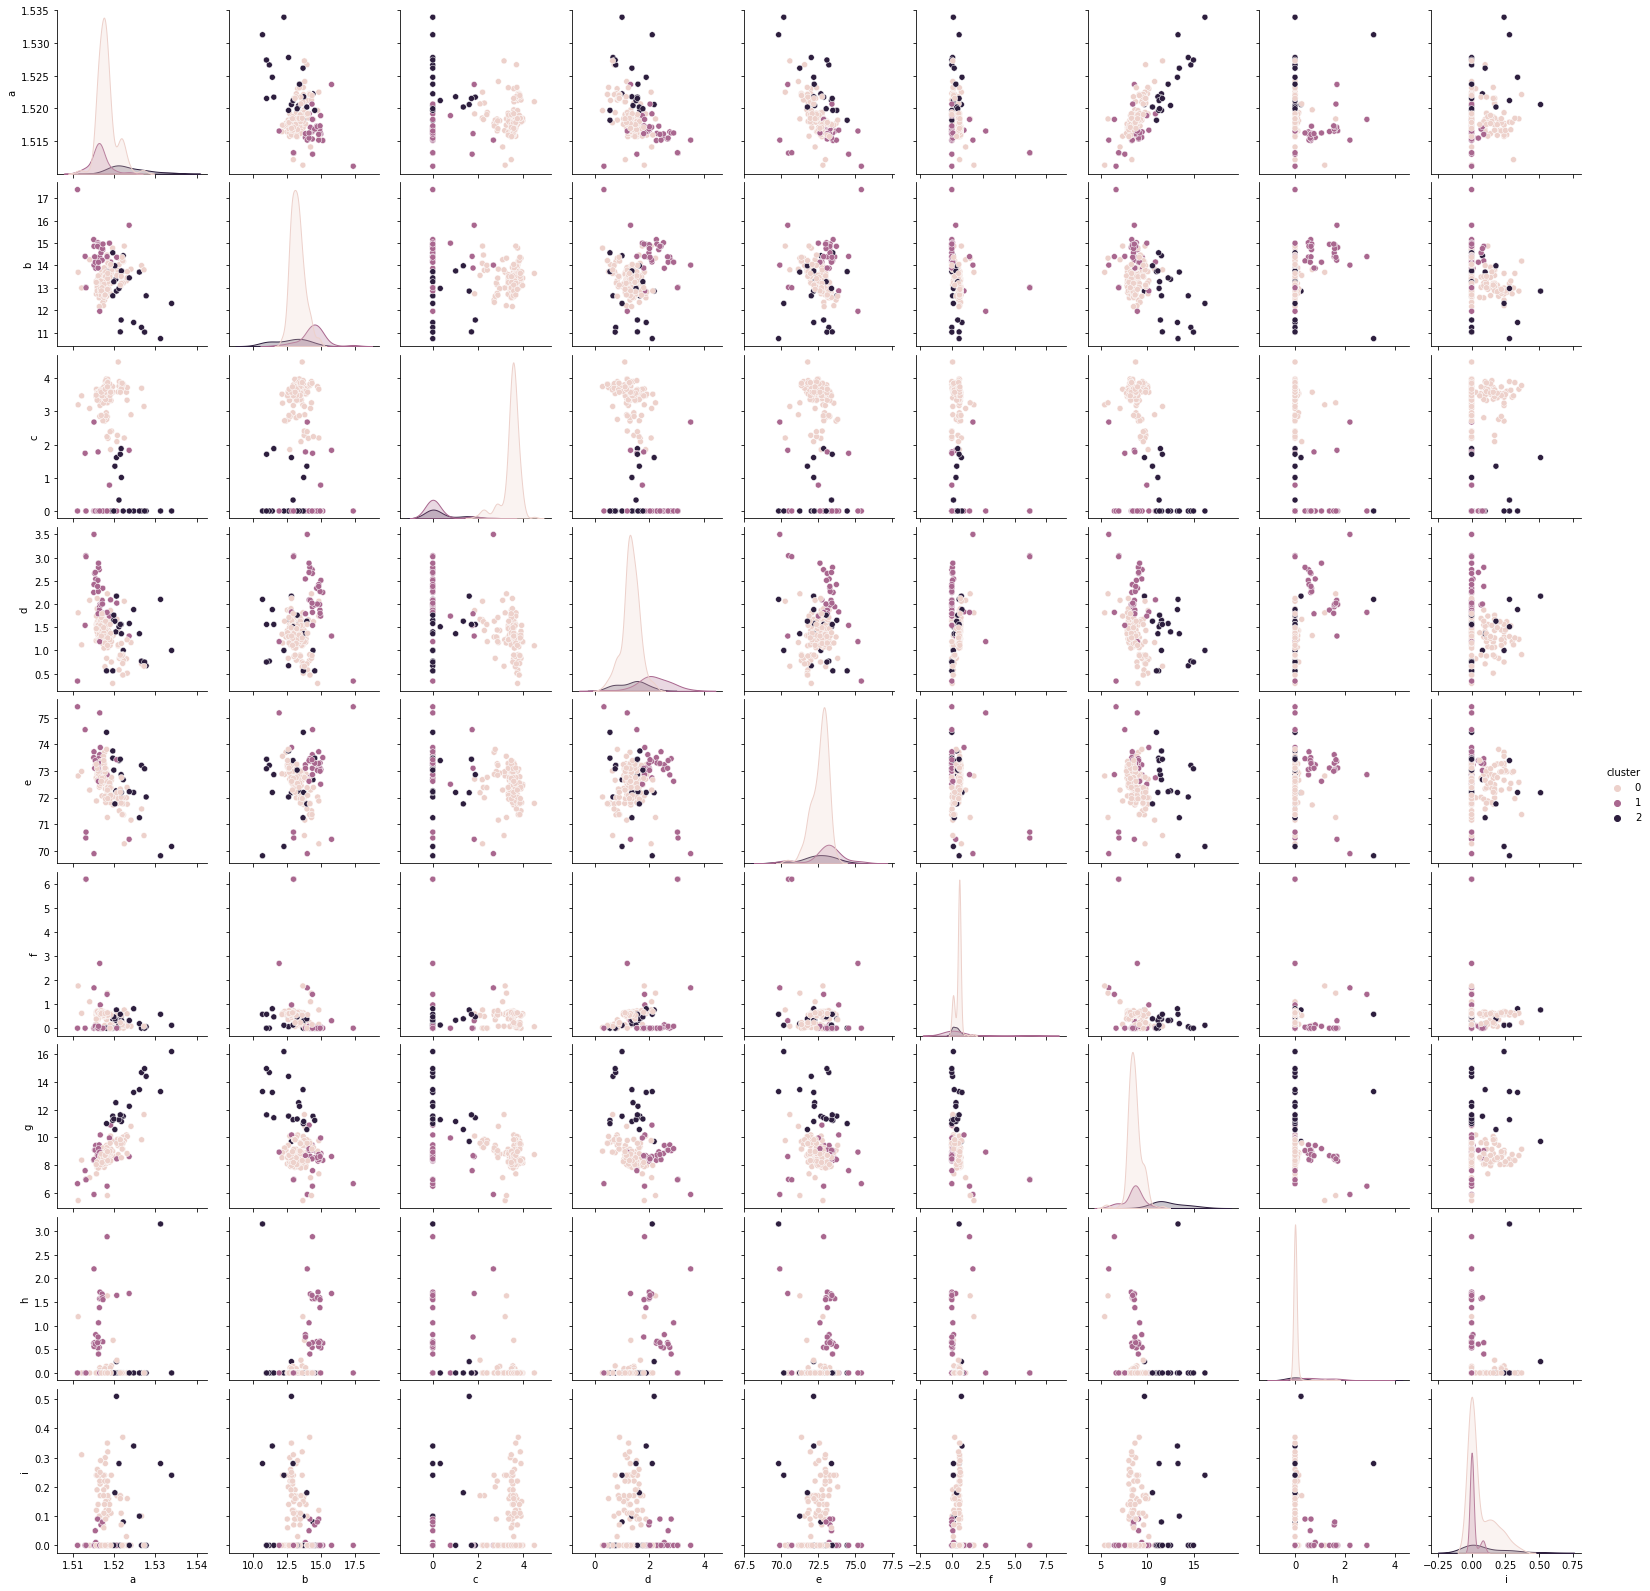

In [110]:
sns.pairplot(ingredients_3D, hue = 'cluster')

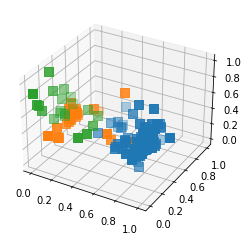

In [134]:
from mpl_toolkits import mplot3d
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in u_labels:
    x = norm_ingredient[label == i, 0]
    y = norm_ingredient[label == i, 1]
    z = norm_ingredient[label == i, 2]
    ax.scatter(z,y,x,marker = 's', s=80) # Plotting each labels

## Principal Component Analysis (PCA)
It is still possible to show the clustering using PCA. In order to reduce the dimention, PCA is used as a major tool for unsupervised learning.

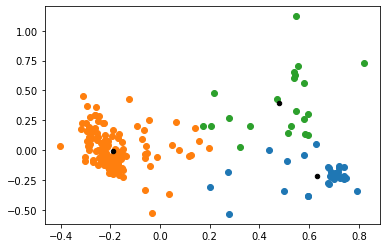

In [142]:
from sklearn.decomposition import PCA
pca = PCA(3)

df = pca.fit_transform(norm_ingredient)
km = KMeans(n_clusters=3)

label = km.fit_predict(df)
centroid = km.cluster_centers_

u_labels = np.unique(label)
 
#plotting the results:
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroid[:,0] , centroid[:,1] , s = 20, color = 'k') # Plotting the centroids

It can clearly be seen that with PCA it is possible to clearly illustrate the clusters with their centroids.